In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib as mpl
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.stats as sm_stats
import statsmodels.stats.api as sms

sns.set_style('white', {'legend.frameon':True})
mpl.rcParams['figure.figsize'] = 25, 10

In [88]:
data = pd.read_csv("data/personal_train.csv", na_values='?', index_col=0)
data.head(25)

,name,address,age,sex,date_of_birth
0,Terry Terry,"11818 Lori Crossing Apt. 802\nPughstad, DC 78165",64.0,M,1954-05-30 00:00:00
1,Edith Boudreaux,"PSC 4657, Box 5446\nAPO AP 58412",37.0,F,1981-07-23 00:00:00
2,Janet Washington,Unit 9759 Box 9470\nDPO AP 45549,69.0,F,1949-02-16 00 00 00
3,Margaret Chabot,"137 Lewis Flat Suite 762\nWest Elizabeth, AL 3...",78.0,F,1939-12-09
4,Colleen Satterwhite,"995 Frank Stravenue\nSouth Matthewport, TX 81402",34.0,F,1984-02-15
5,Judy Smith,"1781 Meredith Skyway Suite 328\nCordovaburgh, ...",70.0,F,1948-10-18
6,Stephen Lalk,"2415 Elizabeth Knoll Suite 030\nCordovafort, C...",35.0,M,1983-03-22
7,Abraham Bruce,"49824 Kim View\nWest Ericborough, VT 42457",73.0,M,1945-07-27
8,Anna Swartz,"53231 Matthew Spur Apt. 079\nNorth Brian, MA 3...",46.0,F,09/02/1972
9,James Wilson,USNV Gallegos\nFPO AA 99743,74.0,M,1944-02-19


In [89]:
data[data['age'] > 1000].head()

,name,address,age,sex,date_of_birth
25,Sandra Cherry,"4017 Marcus Brook\nWest Amber, NY 39009",6600.0,F,1952-10-07
38,Ann Johnson,"38302 Bradshaw Rue\nNorth Hannahshire, NC 34515",4600.0,F,1972-04-18
70,John Nichols,"624 Mackenzie Radial Suite 052\nAnthonystad, M...",2400.0,M,1994-06-16
96,Jason Grimes,"23838 Cameron Cliff Suite 638\nSouth Kevin, VA...",3800.0,NaN,1980-05-14
125,Esther Beaty,"4283 Morales Lake Suite 819\nKathleenmouth, ID...",2300.0,F,12/08/1995


# Dataset personal_train.csv
Mat ulozeny vek je zbytocne ak mame datum narodenia, navyse vo veku v niektorych pripadoch su ocividne chybne udaje a ak bude potrebny tak sa da vypocitat z datumu narodenia, tie vyzeraju OK az na rozne formaty  
Datumy narodenia su v roznych formatoch (niektore maju aj cas, ktory nepotrebujeme) - bude potrebne pouzit konverter pri nacitavani a vsetky formaty zjednotit  
Novy riadok v adrese?  
Prvy stlpec by mohol mat aspon nejaky nazov (vyzera to na nejake id)
Pohlavie ma aj ? - malo by byt null  

In [90]:
data.describe()

,age
count,2236.000000
mean,46.155635
std,1693.680216
min,-8900.000000
25%,35.000000
50%,54.000000
75%,69.000000
max,8900.000000


In [91]:
data.describe(exclude=np.number)

,name,address,sex,date_of_birth
count,2237,2237,2149,2236
unique,2236,2237,2,2192
top,Terry Murphy,"6600 Waters Islands Suite 202\nNew Waynestad, ...",F,1941-01-18
freq,2,1,1448,3


In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2236
Data columns (total 5 columns):
name             2237 non-null object
address          2237 non-null object
age              2236 non-null float64
sex              2149 non-null object
date_of_birth    2236 non-null object
dtypes: float64(1), object(4)
memory usage: 104.9+ KB


In [93]:
data['sex'].unique()

array(['M', 'F', nan], dtype=object)

In [94]:
bulo = lambda vstup: vstup.lower().split('.')[0] == 't'
classa = lambda vstup: vstup.lower().split('.|')[0]
konvertovace = {
    "FTI measured": bulo,
    "tumor": bulo,
    "lithium": bulo,
    "thyroid surgery": bulo,
    "I131 treatment": bulo,
    "goitre": bulo,
    "hypopituitary": bulo,
    "query on thyroxine": bulo,
    "T3 measured": bulo,
    "TBG measured": bulo,
    "pregnant": bulo,
    "class": classa
}
other = pd.read_csv("data/other_train.csv", na_values=['?', '??', ' ?'], index_col=0, true_values=['t'], false_values=['f'],
                    converters=konvertovace)



nastaveny ? a ?? ako NaN hodnoty v read_csv  
nastaveny stlpec cislo 0 ako kluc k riadkom v read_csv  
hodnoty stlpcov kde ma byt boolean su z t a f a t/f.{cislo} zmenene na True a False pouzitim convertoru  


Stlpec class rozdeleny na class name (pred .|) a hodnotu za .| v povodnom stlpci  

In [95]:

other.columns


Index(['name', 'address', 'FTI measured', 'education', 'lithium', 'TT4', 'T4U',
       'capital-loss', 'capital-gain', 'on thyroxine', 'tumor', 'TSH', 'T3',
       'fnlwgt', 'hours-per-week', 'relationship', 'thyroid surgery',
       'workclass', 'I131 treatment', 'class', 'marital-status', 'goitre',
       'native-country', 'hypopituitary', 'query on thyroxine', 'medical_info',
       'T3 measured', 'referral source', 'education-num', 'occupation',
       'TBG measured', 'TBG', 'race', 'pregnant'],
      dtype='object')

In [96]:
other.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
TT4,2124.0,109.394727,35.793095,2.000,88.00,104.00,126.00,430.00
T4U,2036.0,0.996259,0.193135,0.310,0.88,0.98,1.08,2.12
capital-loss,2052.0,86.332359,416.138253,0.000,0.00,0.00,0.00,4356.00
capital-gain,2280.0,761.108772,6264.103513,0.000,0.00,0.00,0.00,99999.00
TSH,2043.0,4.522736,20.220951,0.005,0.45,1.40,2.60,478.00
T3,1800.0,2.023833,0.818254,0.050,1.60,2.00,2.40,10.60
fnlwgt,2278.0,187526.347234,101945.538600,19491.000,117343.50,177675.00,232741.50,799281.00
hours-per-week,2275.0,38.338462,12.171910,1.000,35.00,40.00,40.00,99.00
education-num,2044.0,10.044031,2.480273,1.000,9.00,10.00,12.00,16.00
TBG,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:

other.describe(exclude=np.number).transpose()


,count,unique,top,freq
name,2287,2236,Jeff Hasan,2
address,2287,2237,"1298 Robinson Knolls\nEast Traceystad, MO 31957",2
FTI measured,2287,2,True,2040
education,2280,23,HS-grad,655
lithium,2287,2,False,2276
on thyroxine,2275,2,False,2007
tumor,2287,2,False,2233
relationship,2278,6,Not-in-family,691
thyroid surgery,2287,2,False,2256
workclass,2107,6,Private,1582


In [98]:
other.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2287 entries, 0 to 2286
Data columns (total 34 columns):
name                  2287 non-null object
address               2287 non-null object
FTI measured          2287 non-null bool
education             2280 non-null object
lithium               2287 non-null bool
TT4                   2124 non-null float64
T4U                   2036 non-null float64
capital-loss          2052 non-null float64
capital-gain          2280 non-null float64
on thyroxine          2275 non-null object
tumor                 2287 non-null bool
TSH                   2043 non-null float64
T3                    1800 non-null float64
fnlwgt                2278 non-null float64
hours-per-week        2275 non-null float64
relationship          2278 non-null object
thyroid surgery       2287 non-null bool
workclass             2107 non-null object
I131 treatment        2287 non-null bool
class                 2287 non-null object
marital-status        2280 non-null

Okrem ID, mena a adresy su vo vsetkych stlpcoch null hodnoty

In [99]:
other['FTI measured'].unique()
other['TBG measured'].unique()
other['TBG'].unique()
other.lithium.unique()
other['on thyroxine'].unique()
other['tumor'].unique()
other['relationship'].unique()
other['thyroid surgery'].unique()
other['I131 treatment'].unique()
other['class'].str.partition('|')[0].unique()
other['marital-status'].unique()
other['goitre'].unique()
other['native-country'].unique()
other['hypopituitary'].unique()
other['query on thyroxine'].unique()
other['T3 measured'].unique()
other['referral source'].unique()
other['occupation'].unique()
other['race'].unique()
other['pregnant'].unique()
other['pregnant'].describe()
other['occupation'].unique()
other['workclass'].unique()

array([nan, ' Private', ' Local-gov', ' Federal-gov', ' Self-emp-not-inc',
       ' Self-emp-inc', ' State-gov'], dtype=object)

TBG neobsahuje ziadne hodnoty - je tam bud ? alebo null  
v udajoch su prazdne hodnoty reprezentovane ? aj null (NaN)  
prvy stlpec bez nazvu chce byt nejake ID  
nazov stlpca goitre fnlwgt nedava zmysel a T4 T3 T4U TSH TBG TBG measured nevieme co znamena  
FTI measured obsahuje okrem t, f a nan aj T.4  
TBG measured obsahuje f, nan a f.14 - toto nam asi nebude moc napomocne  
tumor ma f a t a f.11  
thyroid surgery ma t a f a f.5  
workclass ma ? aj nan  
I131 treatment ma f a t a nan a f.6  
class - predpona pred | je s malym aj velkym pismenom, ocazne aj je, co sa tento stlpec vlastne snazi povedat  
goitre - f t nan a f.10  
native country ma ?  
hypopituitary - f nan a f.12 - asi dost zbytocne  
query on thyroxine f nan t a f.1  
medical info ma v sebe JSON s viacerymi udajmi, asi by sa to oplatilo rozbit na viac stlpcov  
T3 measured ma f t nan a t.1  
occupation ma o.i. aj ? aj nan  
  
  
Datasety bude mozne prepojit na mene a adrese

In [100]:

other.select_dtypes(include=np.number).head()

,TT4,T4U,capital-loss,capital-gain,TSH,T3,fnlwgt,hours-per-week,education-num,TBG
0,NaN,NaN,0.0,0.0,NaN,NaN,314645.0,43.0,10.0,NaN
1,166.0,0.80,0.0,0.0,0.015,2.6,147655.0,40.0,9.0,NaN
2,14.0,NaN,0.0,0.0,43.000,0.3,269604.0,40.0,3.0,NaN
3,91.0,1.12,0.0,0.0,5.100,1.8,127647.0,36.0,9.0,NaN
4,122.0,1.00,0.0,0.0,2.800,1.2,35406.0,20.0,9.0,NaN


/usr/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/l

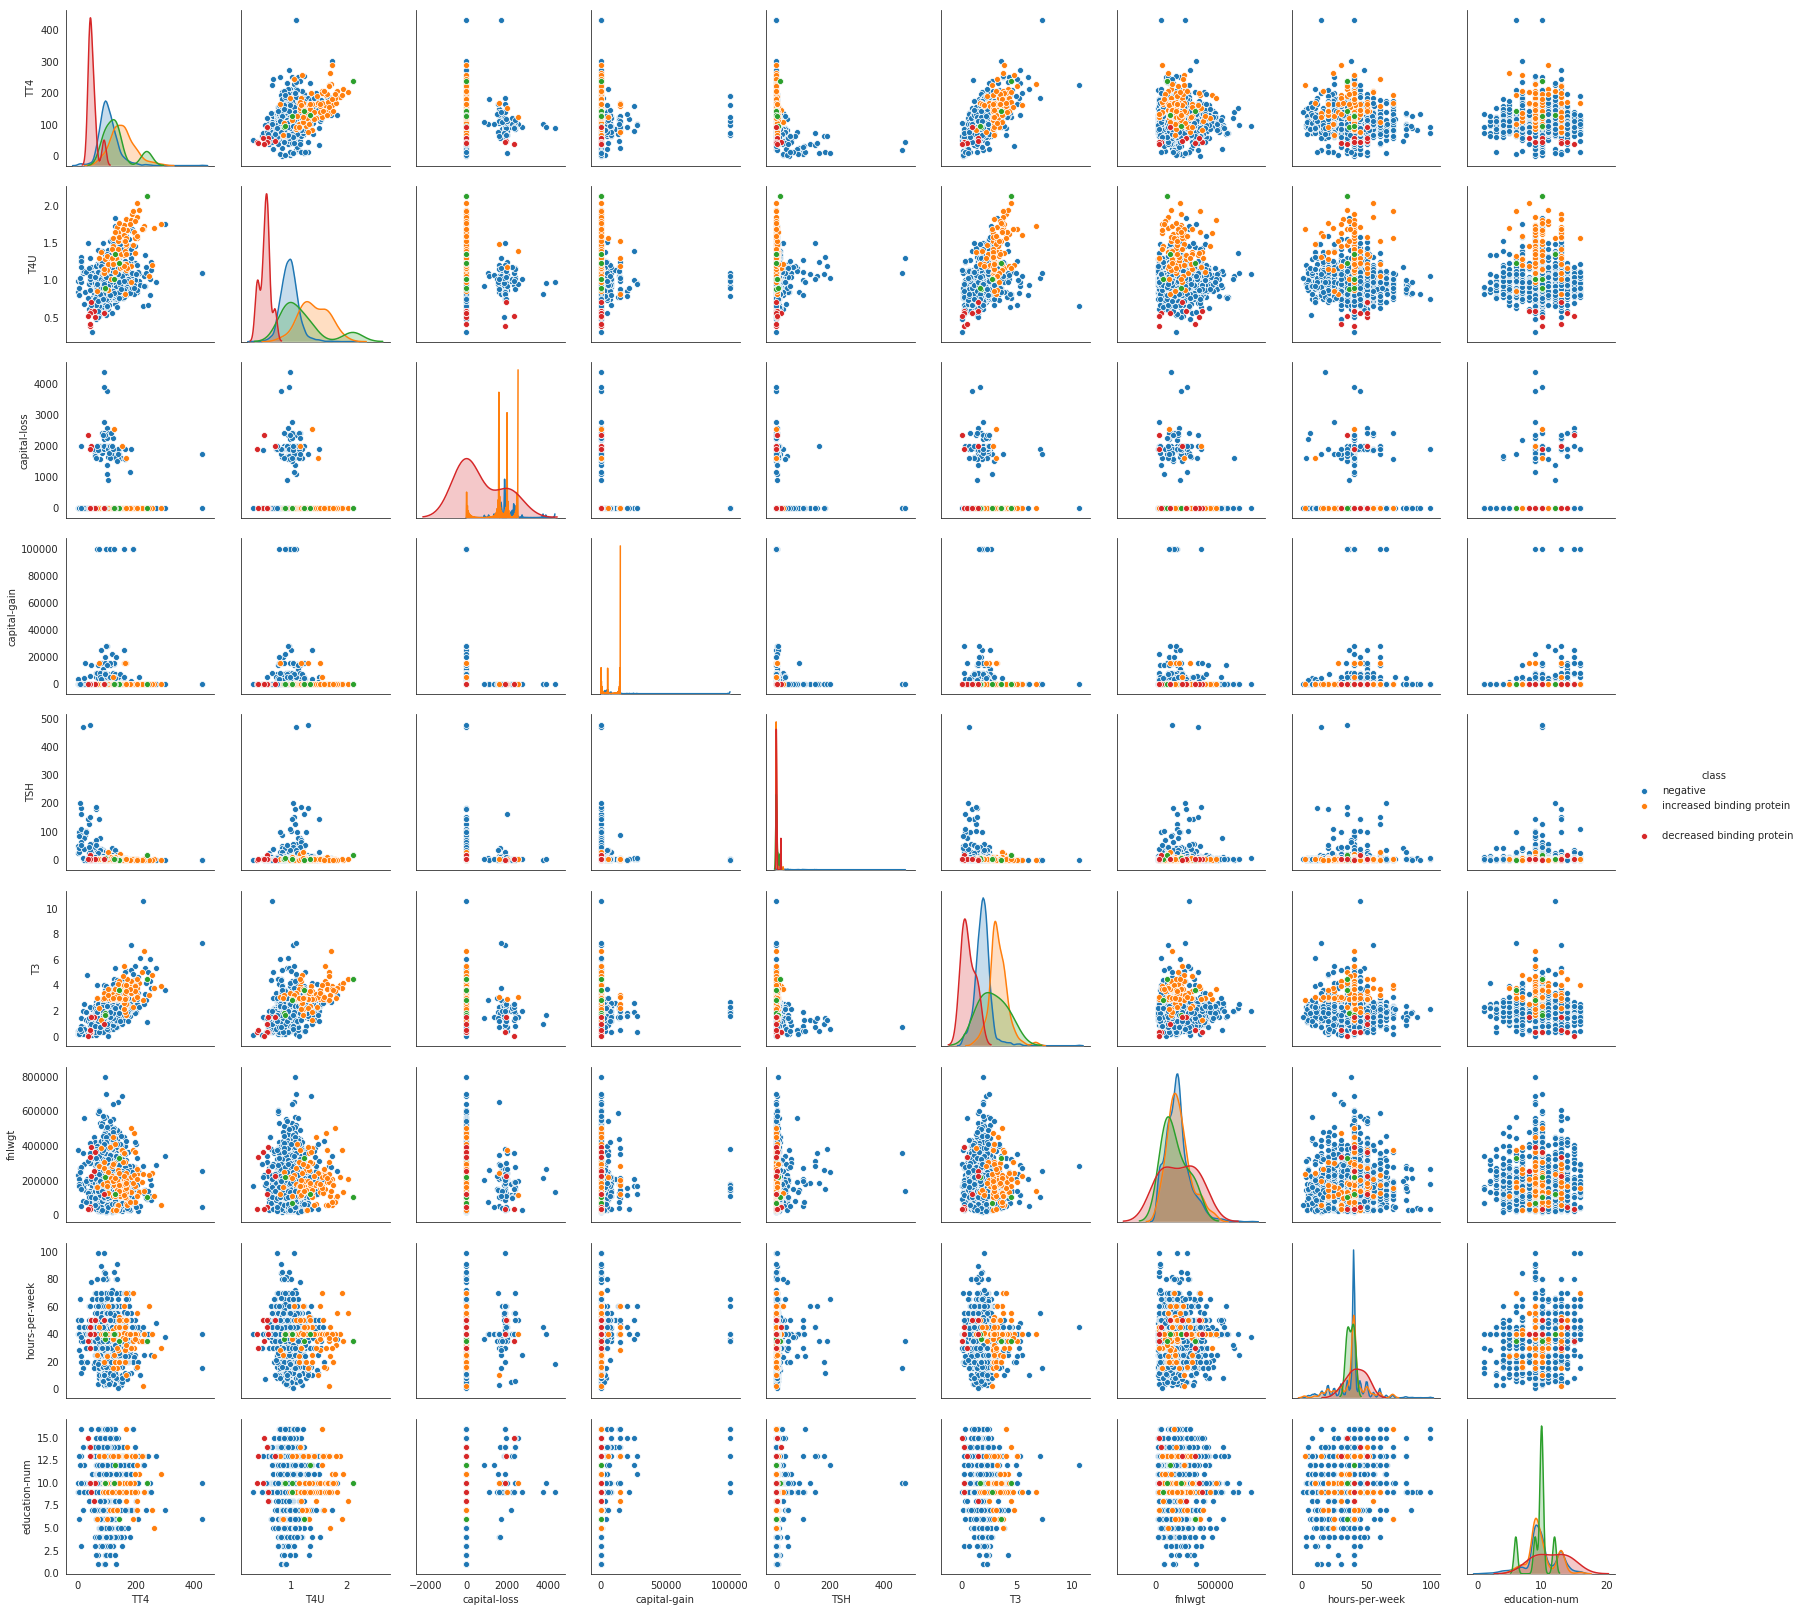

In [101]:
numeric = other.select_dtypes(include=np.number).drop(columns="TBG")
numeric['class'] = other['class']

sns.pairplot(numeric, hue='class')

Vyzera to na zavislost medzi T3 a TT4, T3 a T4U, TT4 a T4U  
Najvacsi vplyv na class vyzera mat T3  
zelene - class je NaN - tieto riadky budeme moct zahodit

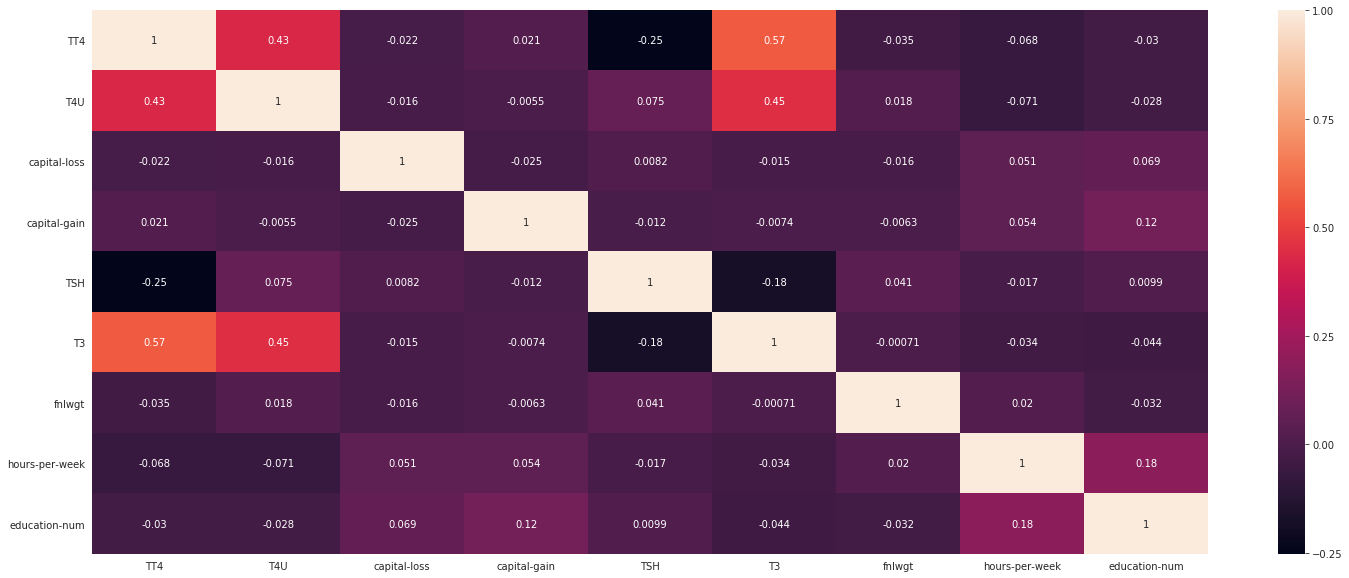

In [102]:
sns.heatmap(numeric.corr(), annot=True)

Najsilnejsia zavislost je medzi TT4 a T3

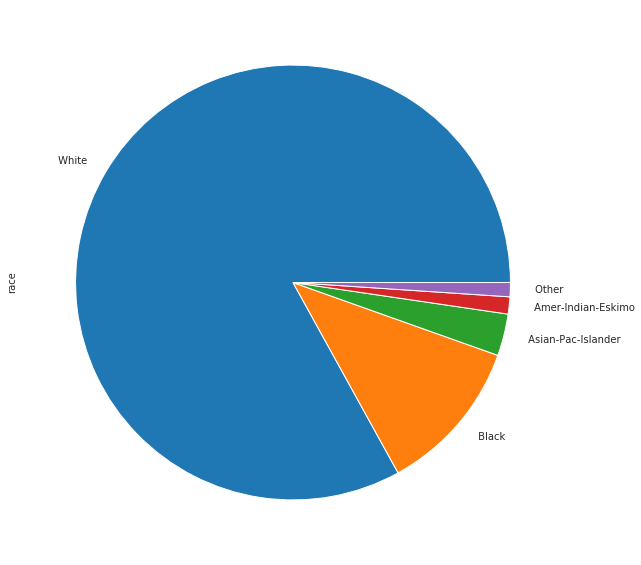

In [103]:
other.race.value_counts().plot(kind='pie')

Vacsina testovanych je belochov a kedze je ich velka vacsina tak tazko urcit, ci ochorenie suvisi s rasou.

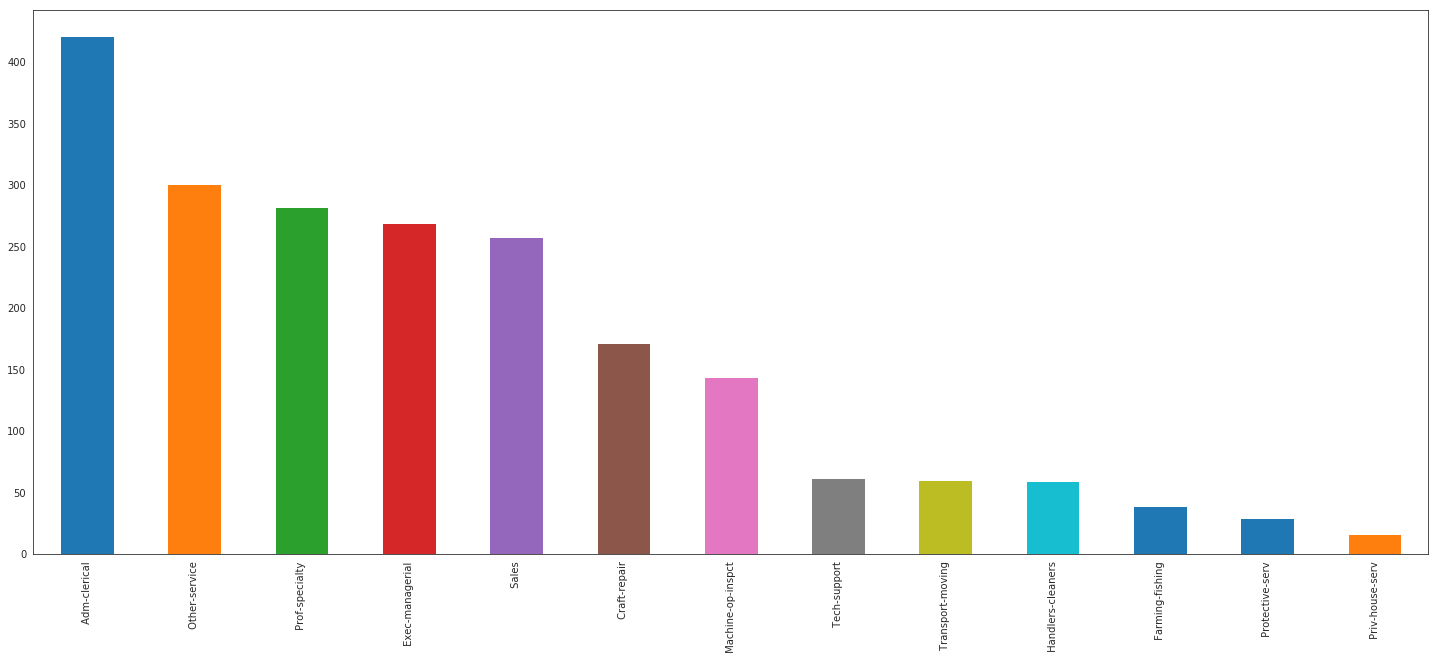

In [104]:
other.occupation.value_counts().plot(kind='bar')

In [105]:
race_class = pd.crosstab(other["occupation"], other["class"])
race_class

class,,decreased binding protein,increased binding protein,negative
occupation,,,,
Adm-clerical,2,0,25,394
Craft-repair,0,0,2,170
Exec-managerial,2,4,13,250
Farming-fishing,0,0,2,37
Handlers-cleaners,1,0,0,58
Machine-op-inspct,0,2,5,137
Other-service,1,2,17,281
Priv-house-serv,0,0,2,14
Prof-specialty,0,1,9,272


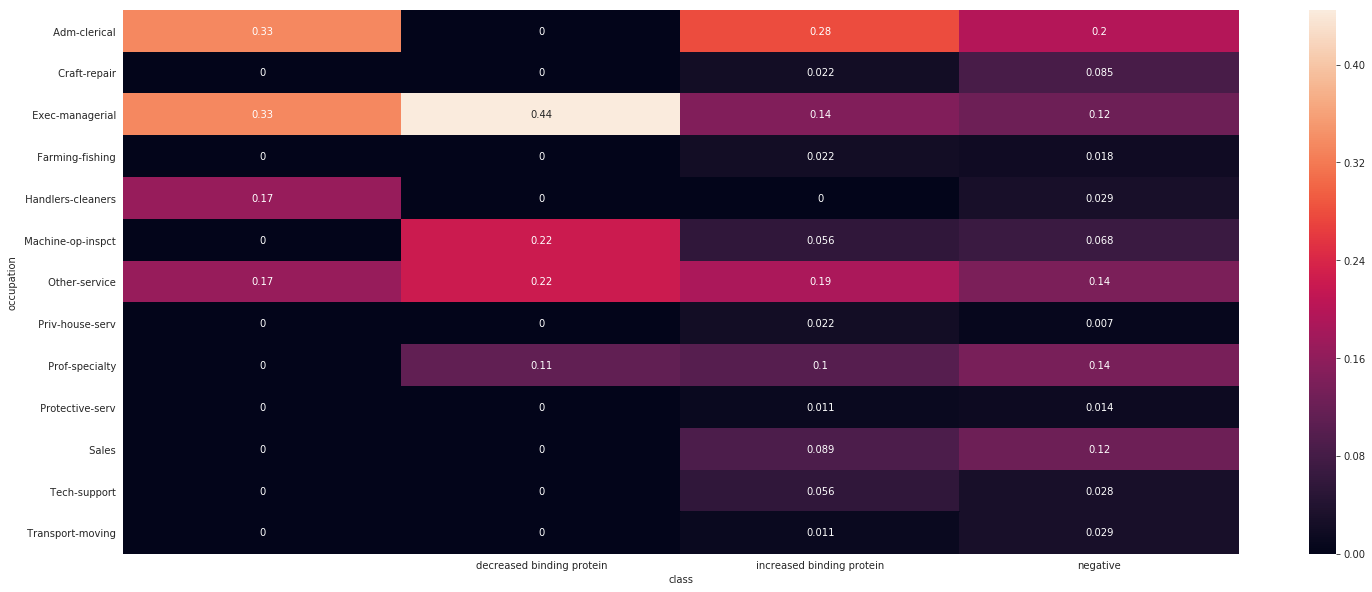

In [106]:
race_class = pd.crosstab(other["occupation"], other["class"], normalize='columns')
sns.heatmap(race_class, annot=True)

Testovany v niektorych zamestnaniach vyzeraju byt nachylnejsi na chorobu (napr. exec-managerial)

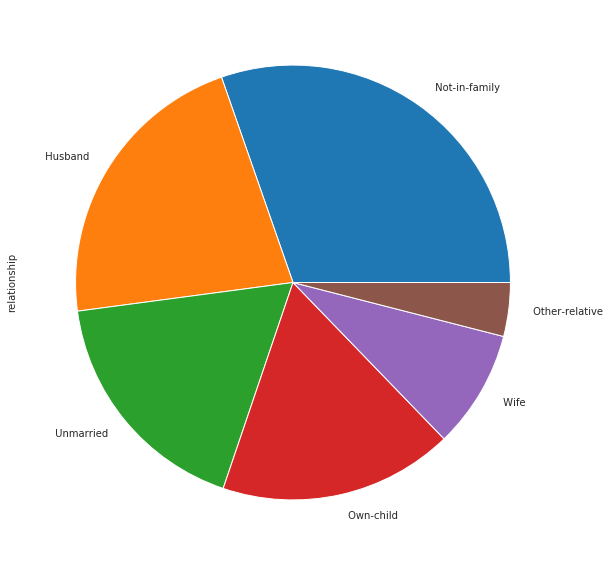

In [107]:
other.relationship.value_counts().plot(kind='pie')

In [108]:
relationship_class = pd.crosstab(other["relationship"], other["class"])
relationship_class

class,,decreased binding protein,increased binding protein,negative
relationship,,,,
Husband,0,3,8,485
Not-in-family,2,4,33,652
Other-relative,0,1,9,81
Own-child,2,0,21,374
Unmarried,2,0,19,382
Wife,0,1,7,192


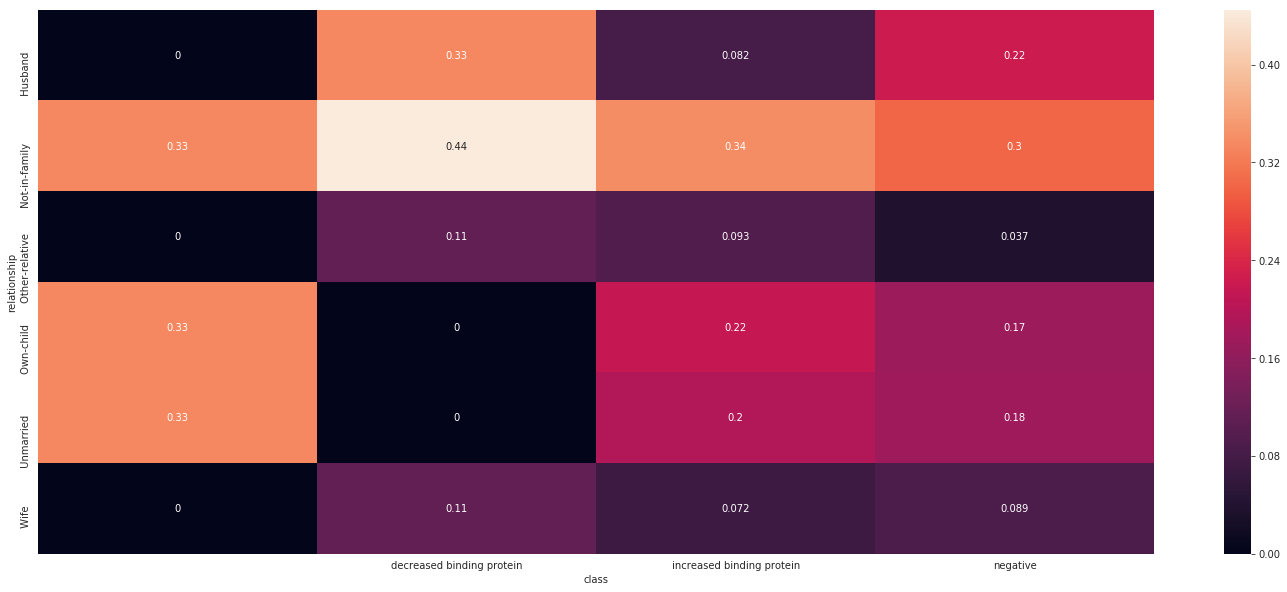

In [109]:
relationship_class = pd.crosstab(other["relationship"], other["class"], normalize='columns')
sns.heatmap(relationship_class, annot=True)

In [110]:
Zda sa, ze vztah neovplyvnuje vyskyt ochorenia.

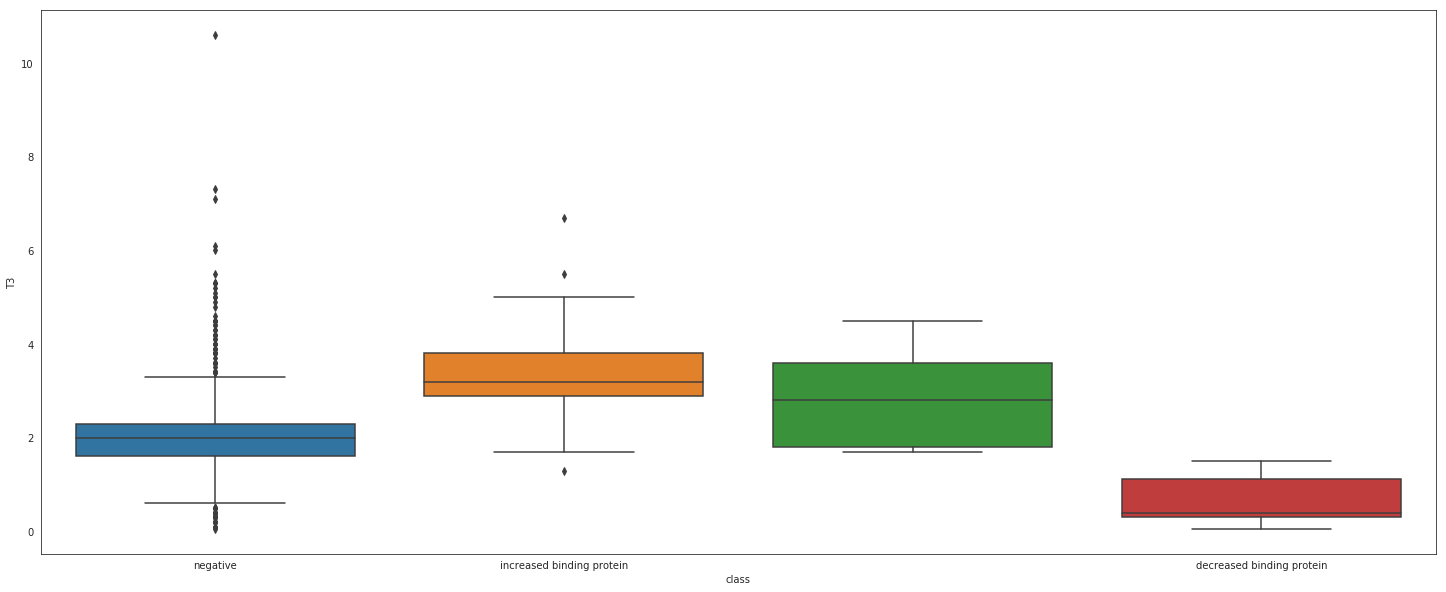

In [111]:
sns.boxplot('class', 'T3', data=other)

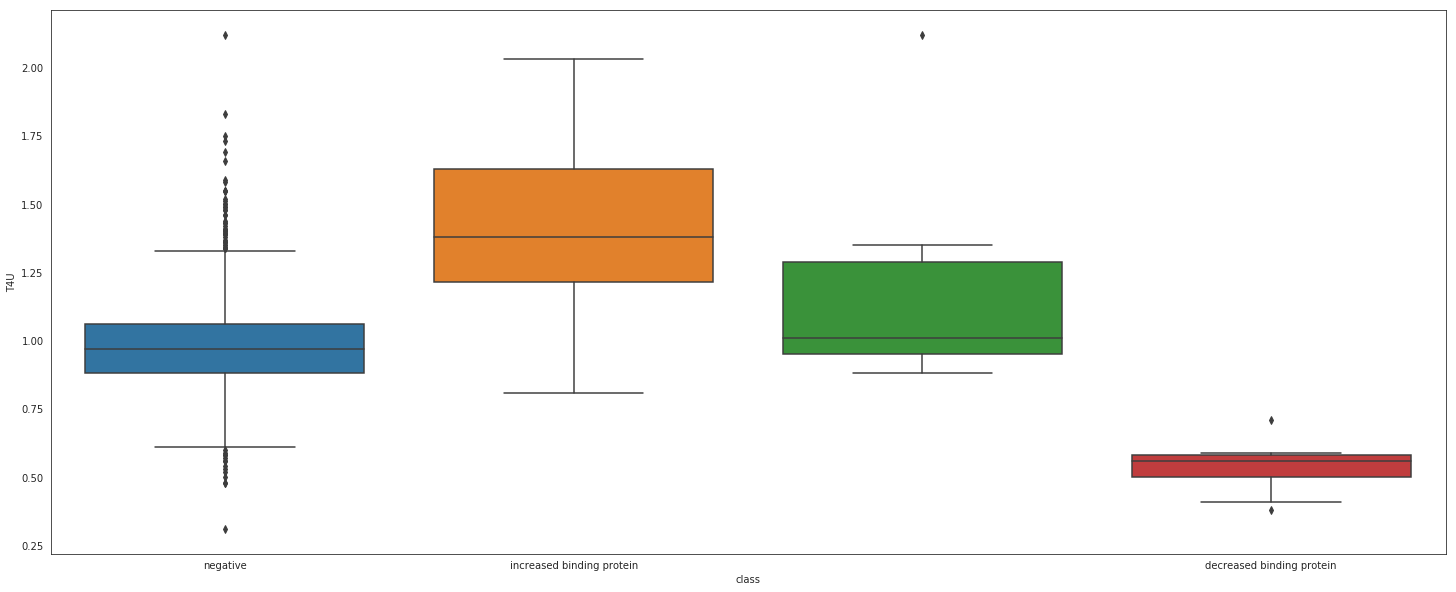

In [112]:
sns.boxplot('class', 'T4U', data=other)

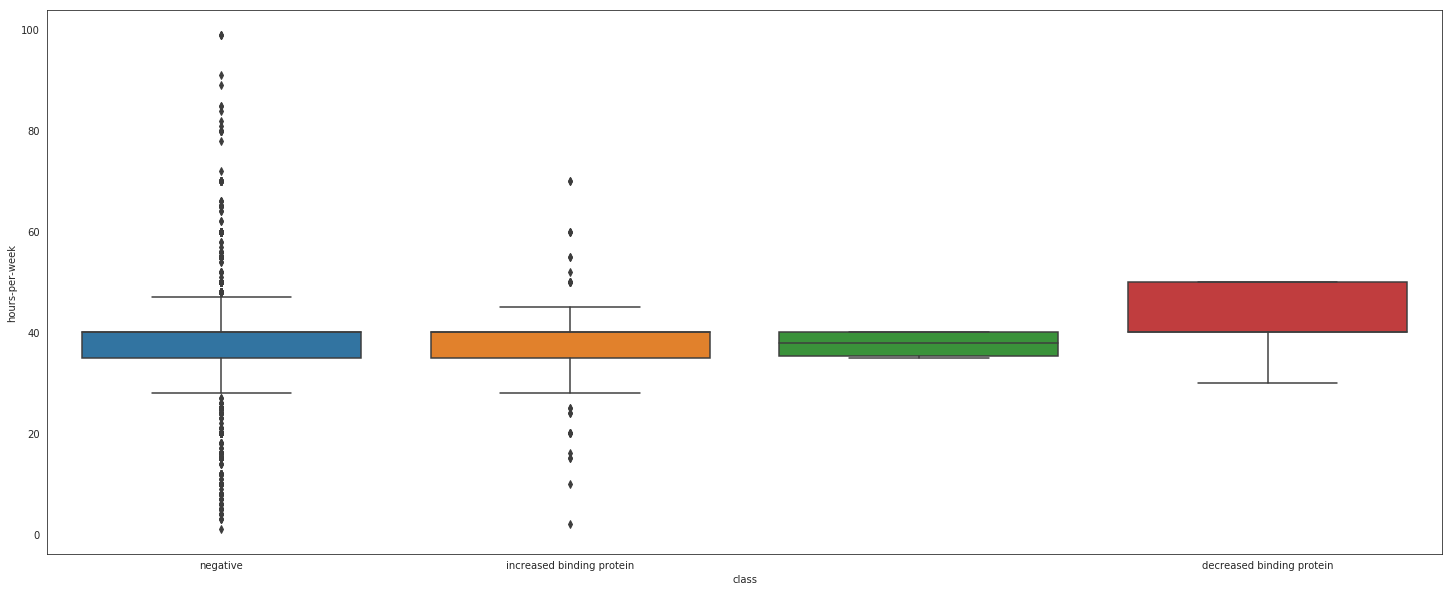

In [113]:
sns.boxplot('class', 'hours-per-week', data=other)

hours-per-week zda sa ze nema velky vplyv na chorobu

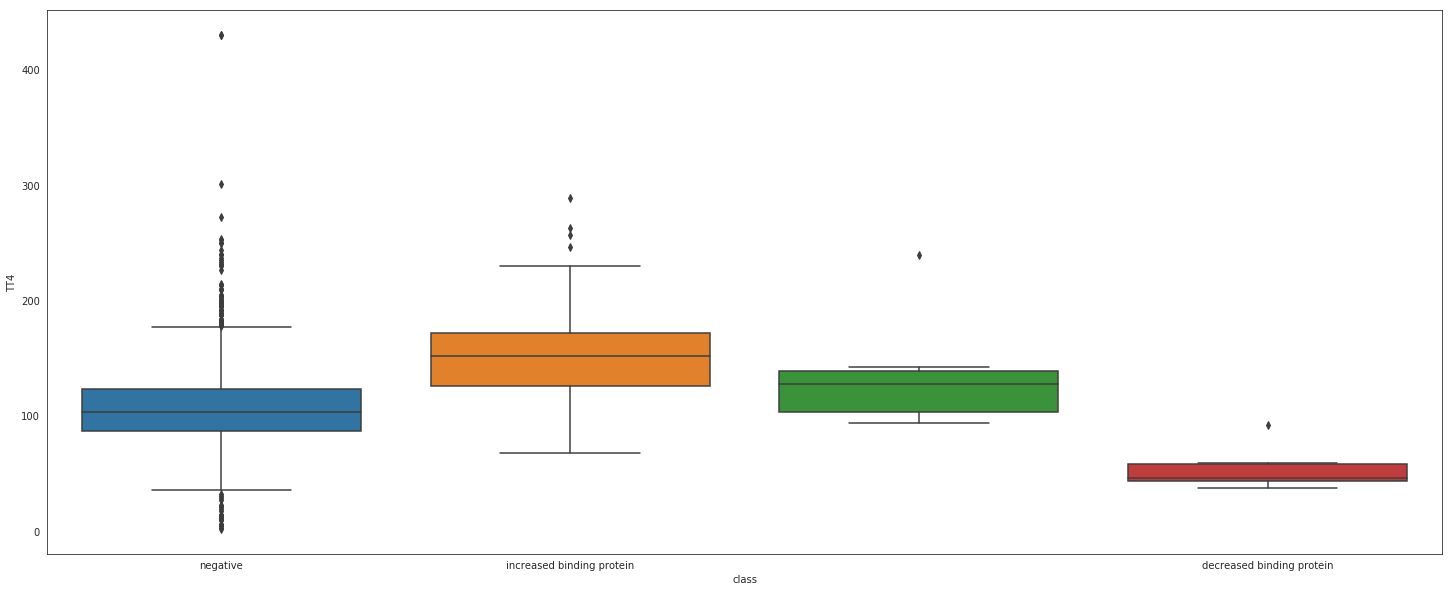

In [114]:
sns.boxplot('class', 'TT4', data=other)

Hypoteza: Rozdiel v T4U u pacientov z class-y IBP a negative je statisticky vyznamny  
  
vzorky: T4U pacientov z jednotlivych class

In [115]:
def outliers(vals):
    lower = vals.quantile(0.25) - 1.5 * stats.iqr(vals)
    upper = vals.quantile(0.75) + 1.5 * stats.iqr(vals)
    
    return vals[(vals > upper) | (vals < lower)]

In [116]:
negative = numeric[numeric['class'] == 'negative']['T4U']
negative = negative.drop(outliers(negative).index)

outliers(negative)

/usr/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


Series([], Name: T4U, dtype: float64)

In [117]:
ibp = numeric[numeric['class'] == 'increased binding protein']['T4U']
ibp = ibp.drop(outliers(ibp).index)


/usr/lib/python3.7/site-packages/numpy/lib/function_base.py:3652: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [118]:
dbp = numeric[numeric['class'] == 'decreased binding protein']['T4U']
dbp = dbp.drop(outliers(dbp).index)

/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result eith

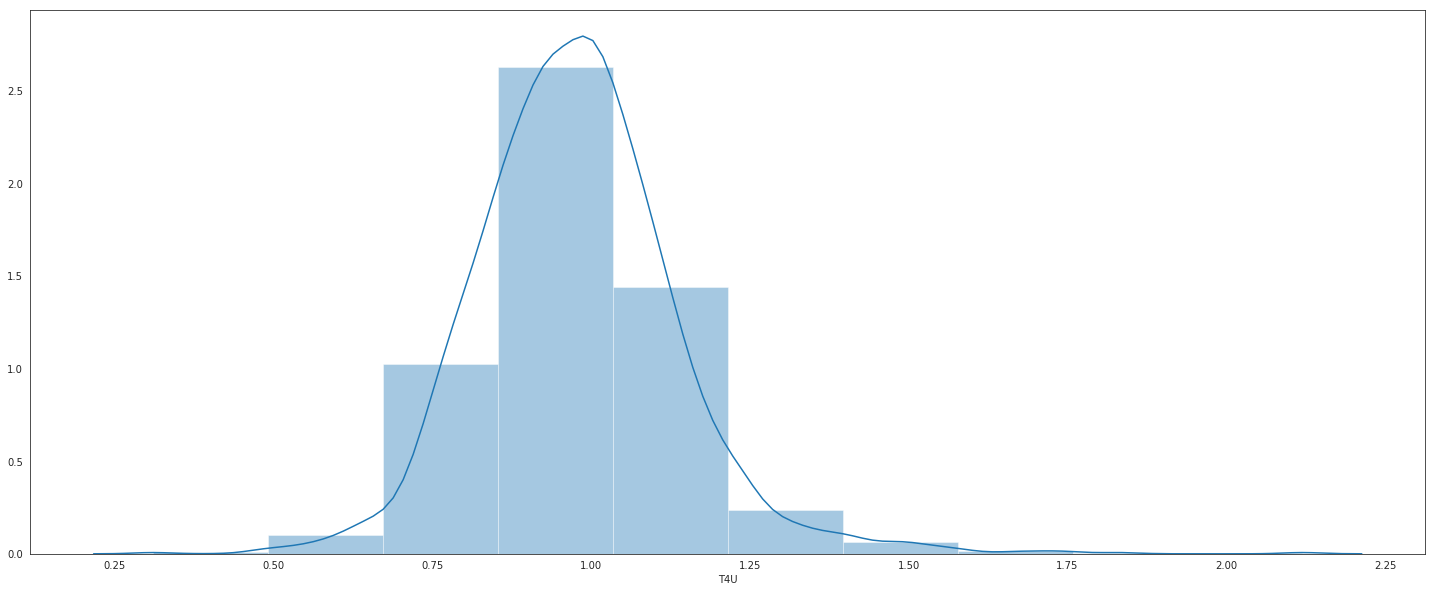

In [119]:
sns.distplot(negative, bins=10)

/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/usr/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result eith

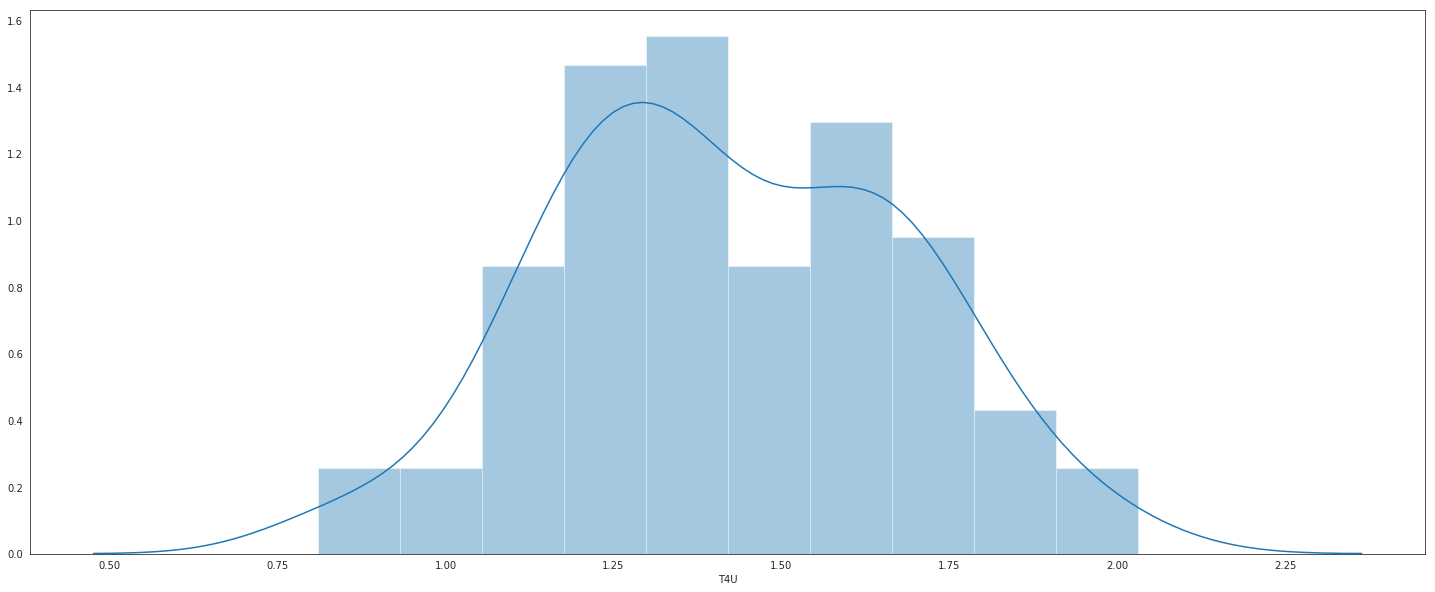

In [120]:
sns.distplot(ibp, bins=10)

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


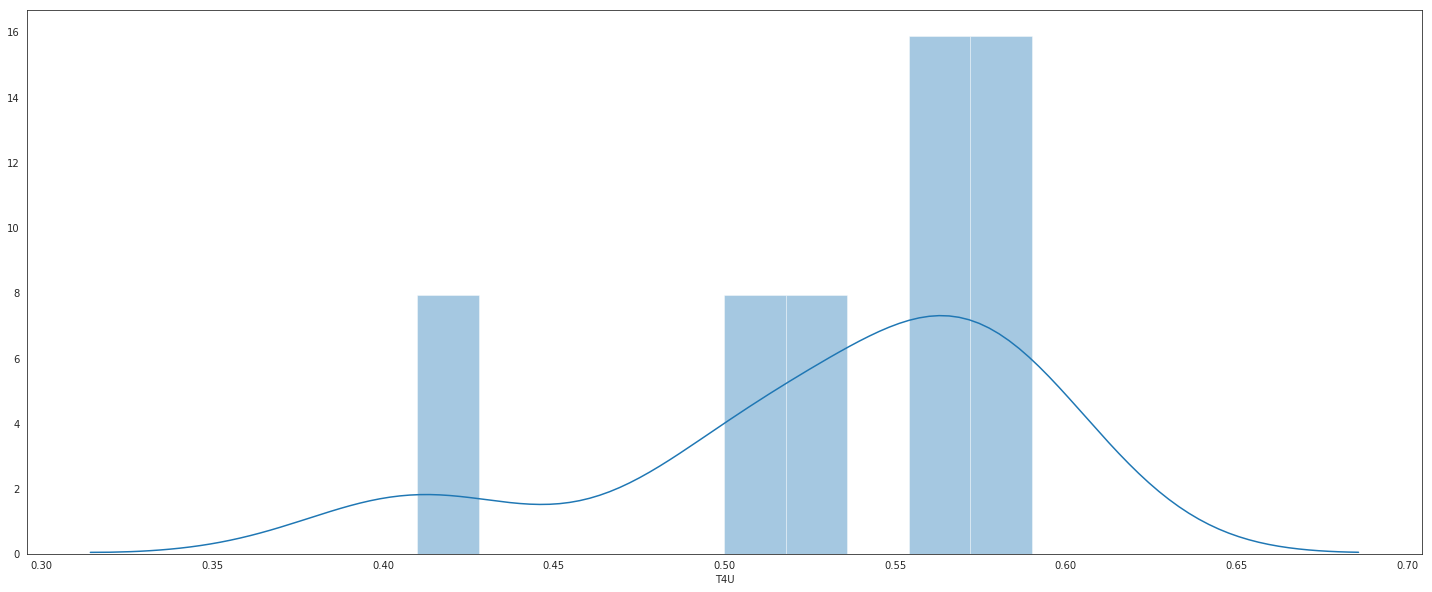

In [121]:
sns.distplot(dbp, bins=10)

In [122]:
stats.shapiro(negative.dropna().values)

(0.9654017090797424, 4.510271356295357e-21)

In [123]:
stats.shapiro(ibp.dropna().values)

(0.9866359829902649, 0.45100879669189453)

In [124]:
stats.shapiro(dbp.dropna().values)

(0.8664984107017517, 0.17293302714824677)

In [125]:
stats.shapiro(ibp.dropna().values)

(0.9866359829902649, 0.45100879669189453)

In [126]:
stats.levene(negative.dropna().values, ibp.dropna().values)

LeveneResult(statistic=74.85511624559688, pvalue=1.015560393752538e-17)

Nepodarilo sa overit predpoklady t-testu.

In [127]:
stats.mannwhitneyu(negative.dropna().values, ibp.dropna().values)

MannwhitneyuResult(statistic=12519.5, pvalue=3.2883293215685244e-46)

Mann Whitney U-test vratil p < 0,001. Rozdiel T4U u pacientov z triedy negative a IBP je statisticky signifikantny.

In [128]:
ibp = numeric[numeric['class'] == 'increased binding protein']['TT4']
ibp = ibp.drop(outliers(ibp).index)


In [129]:
dbp = numeric[numeric['class'] == 'decreased binding protein']['TT4']
dbp = dbp.drop(outliers(dbp).index)

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


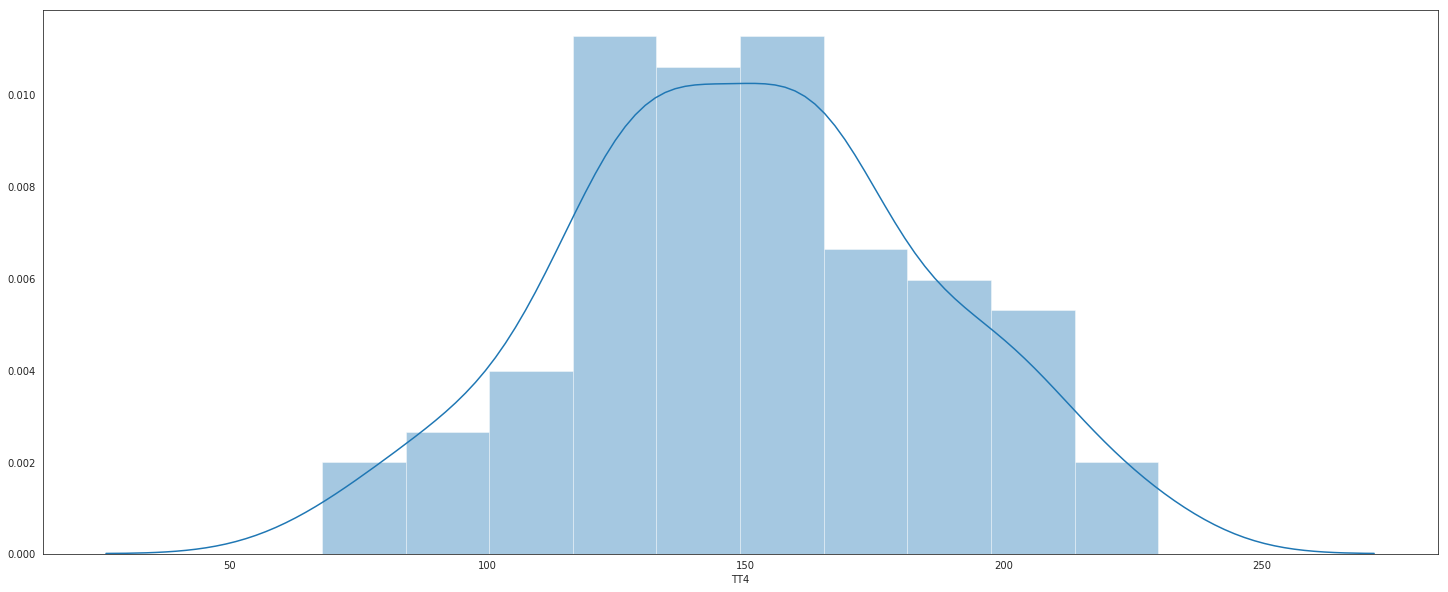

In [130]:
sns.distplot(ibp, bins=10)

/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


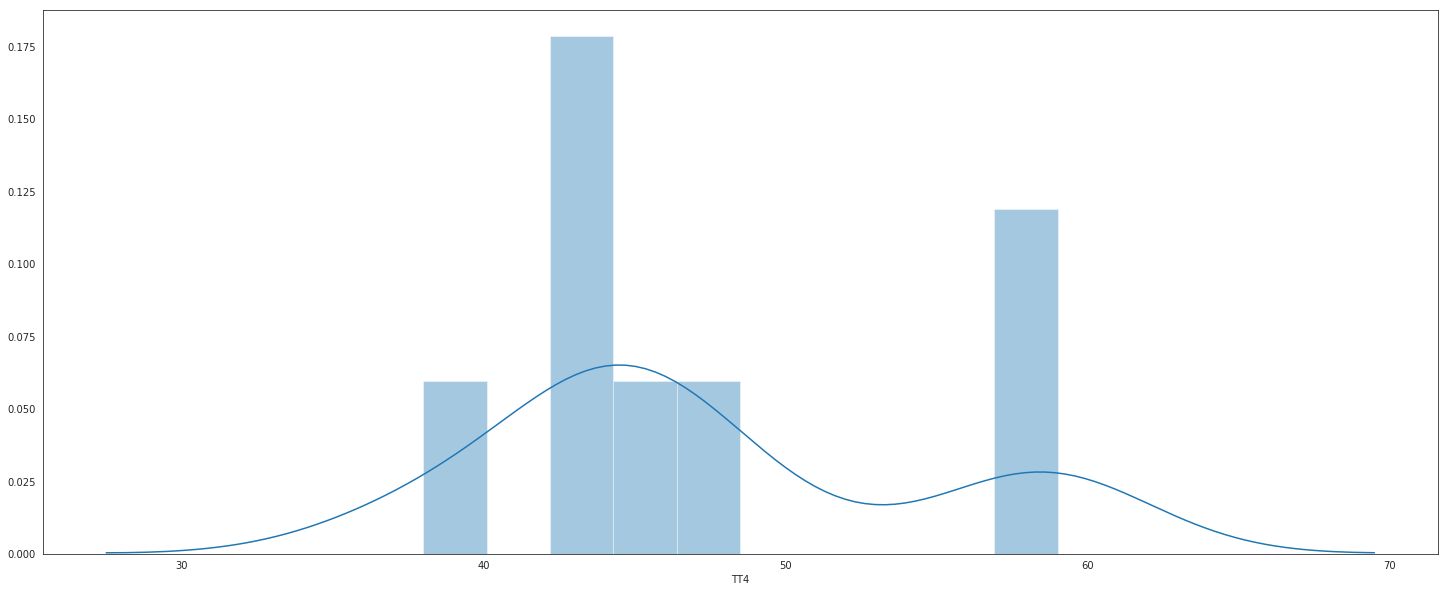

In [131]:
sns.distplot(dbp, bins=10)

In [132]:
stats.shapiro(ibp.dropna().values)

In [133]:
stats.shapiro(dbp.dropna().values)

In [134]:
stats.levene(ibp.dropna().values, dbp.dropna().values)

LeveneResult(statistic=10.188724251481426, pvalue=0.0018941528473348677)

opat nie je mozne pouzit t-test

In [135]:
stats.mannwhitneyu(dbp.dropna().values, ibp.dropna().values)

MannwhitneyuResult(statistic=0.0, pvalue=1.4902768200903584e-06)

Mann Whitney U-test vratil p < 0,001. Rozdiel TT4 u pacientov z triedy DBP a IBP je statisticky signifikantny.